In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display
from matplotlib import rcParams
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [5]:
path = './data'
songs = pd.read_csv(path+'/songs_final.csv')

display(songs.info())
display(songs.describe().T)
songs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4800 non-null   object 
 1   primary_artist    4800 non-null   object 
 2   danceability      4800 non-null   float64
 3   energy            4800 non-null   float64
 4   key               4800 non-null   int64  
 5   loudness          4800 non-null   float64
 6   mode              4800 non-null   int64  
 7   speechiness       4800 non-null   float64
 8   acousticness      4800 non-null   float64
 9   instrumentalness  4800 non-null   float64
 10  liveness          4800 non-null   float64
 11  valence           4800 non-null   float64
 12  tempo             4800 non-null   float64
 13  time_signature    4800 non-null   int64  
 14  duration_s        4800 non-null   int64  
 15  year              4800 non-null   int64  
 16  genres            4800 non-null   object 


None

count         mean        std          min          25%  \
danceability      4800.0     0.630908   0.147346     0.135000     0.539000   
energy            4800.0     0.663262   0.189208     0.026400     0.534750   
key               4800.0     5.306875   3.603180     0.000000     2.000000   
loudness          4800.0    -7.941893   3.454099   -24.709000   -10.088500   
mode              4800.0     0.662500   0.472906     0.000000     0.000000   
speechiness       4800.0     0.071971   0.075093     0.022500     0.032700   
acousticness      4800.0     0.199933   0.226299     0.000005     0.026075   
instrumentalness  4800.0     0.028952   0.118180     0.000000     0.000000   
liveness          4800.0     0.173598   0.141214     0.015000     0.083575   
valence           4800.0     0.597184   0.240588     0.038100     0.410000   
tempo             4800.0   119.899201  26.666675    50.937000    99.981000   
time_signature    4800.0     3.975208   0.209212     1.000000     4.000000   
duration_s        4800.0   243.995833  60.975572    93.000000   209.000000   
year              4800.0  1994.250000  14.659432  1970.000000  1981.750000   

                          50%          75%       max  
danceability         0.644000     0.734000     0.980  
energy               0.686000     0.817000     0.996  
key                  5.000000     9.000000    11.000  
loudness            -7.247000    -5.304500    -0.140  
mode                 1.000000     1.000000     1.000  
speechiness          0.043100     0.071825     0.911  
acousticness         0.106000     0.305000     0.978  
instrumentalness     0.000009     0.000961     0.985  
liveness             0.119000     0.223000     0.989  
valence              0.615500     0.800000     0.989  
tempo              119.536500   133.935750   210.857  
time_signature       4.000000     4.000000     5.000  
duration_s         235.000000   269.000000  1561.000  
year              1993.500000  2007.250000  2019.000

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy  key  loudness  mode  speechiness  acousticness  \
0      0.403    0    -8.339     1       0.0322        0.6310   
1      0.876    0    -8.867     1       0.0362        0.3570   
2      0.473    2   -11.454     1       0.0601        0.5450   
3      0.797    7    -6.793     1       0.0332        0.0424   
4      0.470    4    -9.135     1       0.0356        0.5790   
...      ...  ...       ...   ...          ...           ...   
4795   0.839   11    -9.447     0       0.2080        0.0933   
4796   0.538    5    -6.672     1       0.0335        0.1700   
4797   0.678    9    -8.635     1       0.1090        0.0669   
4798   0.460    5    -4.173     1       0.2590        0.4760   
4799   0.136    6    -9.267     1       0.0458        0.9320   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000000    0.1110   0.4100  143.462               4   
1             0.000005    0.2200   0.9540  102.762               4   
2             0.000001    0.0356   0.5610   77.583               4   
3             0.000407    0.0717   0.6220  123.566               4   
4             0.000000    0.5810   0.9700   85.527               4   
...                ...       ...      ...      ...             ...   
4795          0.000000    0.1020   0.7270  133.989               4   
4796          0.000003    0.2480   0.2880  148.051               4   
4797          0.000000    0.2740   0.8110   97.984               4   
4798          0.000000    0.1070   0.6230  176.055               4   
4799          0.000000    0.0653   0.0976   67.016               3   

      duration_s  year                                   genres  \
0            243  1970                                 ['rock']   
1            175  1970                         ['folk', 'rock']   
2            199  1970                        ['blues', 'soul']   
3            147  1970                                 ['rock']   
4            135  1970                         ['folk', 'rock']   
...          ...   ...                                      ...   
4795         191  2019  ['dance/electronic', 'hip hop', 'rock']   
4796         234  2019                                  ['pop']   
4797         201  2019                                  ['rap']   
4798         158  2019                                  ['pop']   
4799         226  2019                                  ['pop']   

                                                 lyrics  
0     When I find myself in times of trouble Mother ...  
1     Cilia youre breaking my heart. Youre shaking m...  
2     Billy Ray was a preachers son. And when his da...  
3     Long as I remember the rain been coming down. ...  
4     They paved paradise and put up a parking lot. ...  
...                                                 ...  
4795  No one sees. No one. One. No one sees. No one ...  
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...  
4797  Right now. I just need you to get real loose. ...  
4798  Is it easier to stay Is it easier to go. I don...  
47

In [6]:
# Reformat some columns
songs.drop_duplicates()
songs['mode'].replace({1: 'Major', 0: 'minor'}, inplace=True)
key_dict = { 0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭',
             4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G',
             8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B',
             -1: 'Unknown'
           }
songs['key'].replace(key_dict, inplace=True)

songs

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy    key  loudness   mode  speechiness  acousticness  \
0      0.403      C    -8.339  Major       0.0322        0.6310   
1      0.876      C    -8.867  Major       0.0362        0.3570   
2      0.473      D   -11.454  Major       0.0601        0.5450   
3      0.797      G    -6.793  Major       0.0332        0.0424   
4      0.470      E    -9.135  Major       0.0356        0.5790   
...      ...    ...       ...    ...          ...           ...   
4795   0.839      B    -9.447  minor       0.2080        0.0933   
4796   0.538      F    -6.672  Major       0.0335        0.1700   
4797   0.678      A    -8.635  Major       0.1090        0.0669   
4798   0.460      F    -4.173  Major       0.2590        0.4760   
4799   0.136  F♯/G♭    -9.267  Major       0.0458        0.9320   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000000    0.1110   0.4100  143.462               4   
1             0.000005    0.2200   0.9540  102.762               4   
2             0.000001    0.0356   0.5610   77.583               4   
3             0.000407    0.0717   0.6220  123.566               4   
4             0.000000    0.5810   0.9700   85.527               4   
...                ...       ...      ...      ...             ...   
4795          0.000000    0.1020   0.7270  133.989               4   
4796          0.000003    0.2480   0.2880  148.051               4   
4797          0.000000    0.2740   0.8110   97.984               4   
4798          0.000000    0.1070   0.6230  176.055               4   
4799          0.000000    0.0653   0.0976   67.016               3   

      duration_s  year                                   genres  \
0            243  1970                                 ['rock']   
1            175  1970                         ['folk', 'rock']   
2            199  1970                        ['blues', 'soul']   
3            147  1970                                 ['rock']   
4            135  1970                         ['folk', 'rock']   
...          ...   ...                                      ...   
4795         191  2019  ['dance/electronic', 'hip hop', 'rock']   
4796         234  2019                                  ['pop']   
4797         201  2019                                  ['rap']   
4798         158  2019                                  ['pop']   
4799         226  2019                                  ['pop']   

                                                 lyrics  
0     When I find myself in times of trouble Mother ...  
1     Cilia youre breaking my heart. Youre shaking m...  
2     Billy Ray was a preachers son. And when his da...  
3     Long as I remember the rain been coming down. ...  
4     They paved paradise and put up a parking lot. ...  
...                                                 ...  
4795  No one sees. No one. One. No one sees. No one ...  
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...  
4797  Right now. I just need you to get real loose. ...  
4798  Is it easier to st

In [7]:
print('Common keys: \n', songs['key'].value_counts().sort_values(ascending=False), '\n')

# Artists with multiple appearances
artists = songs['primary_artist'].value_counts().sort_values(ascending=False)
artists.columns = ['artist', 'appearances']
print('Common artists: \n', artists)

Common keys: 
 C        576
G        504
A        489
C♯/D♭    481
D        452
F        419
B        405
E        376
A♯/B♭    322
G♯/A♭    320
F♯/G♭    319
D♯/E♭    137
Name: key, dtype: int64 

Common artists: 
 Michael Jackson    29
Madonna            28
Rihanna            28
Elton John         27
Drake              24
                   ..
Travie McCoy        1
Iyaz                1
Don Omar            1
Stromae             1
Freya Ridings       1
Name: primary_artist, Length: 1897, dtype: int64


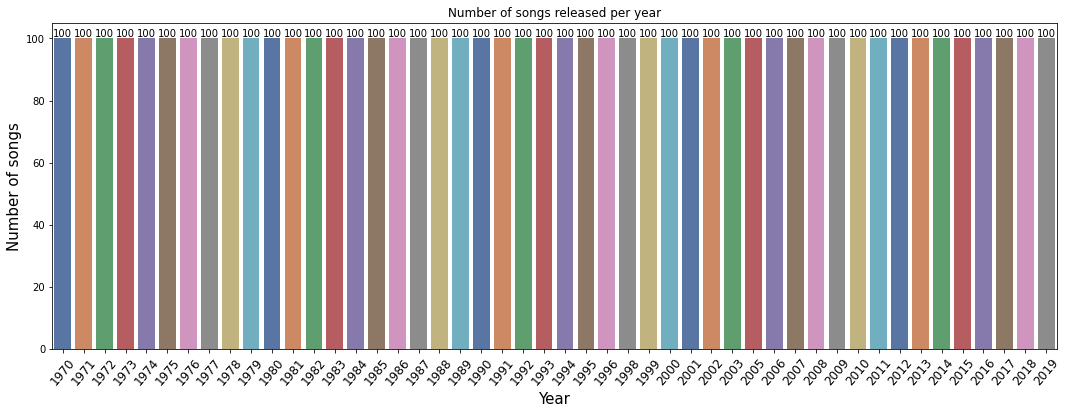

In [8]:
songs_per_year = (songs.year.value_counts().rename_axis('year').reset_index(name = 'songs'))

plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)
plt.show()

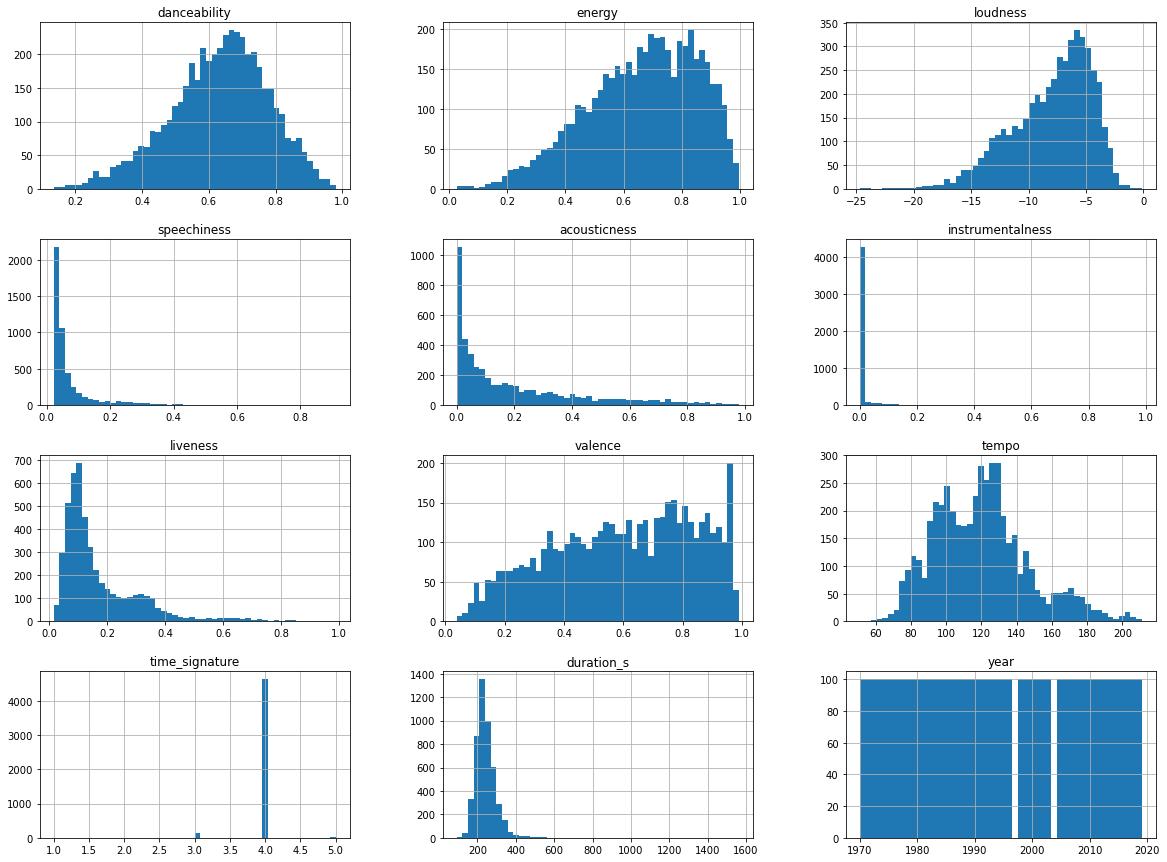

In [9]:
# Histogram for quantifiable features
songs.hist(bins=50,figsize=(20,15))
plt.show()

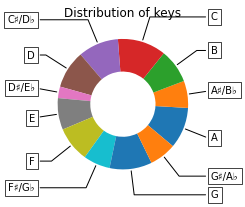

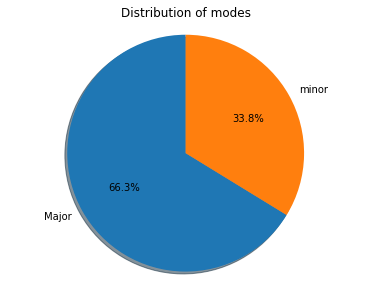

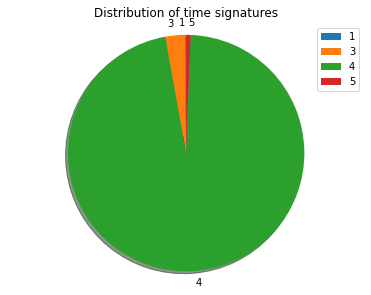

In [10]:
# Some pie charts showing the distrubution of key, mode and time signature
ig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
key_labels = sorted(songs['key'].unique())
key_sizes = songs['key'].value_counts().sort_index().to_list()
wedges, texts = ax.pie(key_sizes, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(key_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Distribution of keys")
plt.show()


mode_sizes = songs['mode'].value_counts().sort_index().to_list()
mode_labels = sorted(songs['mode'].unique())
explode = (0, 0)
fig2, ax2 = plt.subplots()
ax2.pie(mode_sizes, explode=explode, labels=mode_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') 
ax2.set_title("Distribution of modes")
plt.show()

time_sizes = songs['time_signature'].value_counts().sort_index().to_list()
time_labels = sorted(songs['time_signature'].unique())
explode = (0, 0, 0, 0)
fig3, ax3 = plt.subplots()
ax3.pie(time_sizes, explode=explode, labels=time_labels, shadow=True, startangle=90)
ax3.axis('equal') 
ax3.set_title("Distribution of time signatures")
plt.legend()
plt.show()

                   tempo
primary_artist          
MoKenStef         64.979
Freya Ridings     67.016
Bobby McFerrin    68.837
Tom Walker        68.976
Jeffrey Osborne   69.199
...                  ...
Steve Perry      203.753
Blake Shelton    205.570
Carole King      208.282
John Waite       208.571
The Nolans       210.654

[1897 rows x 1 columns]


<AxesSubplot:title={'center':'Average speechiness changes over year'}, xlabel='year'>

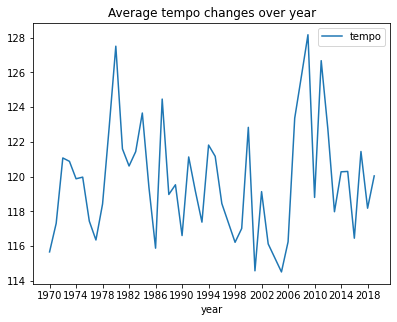

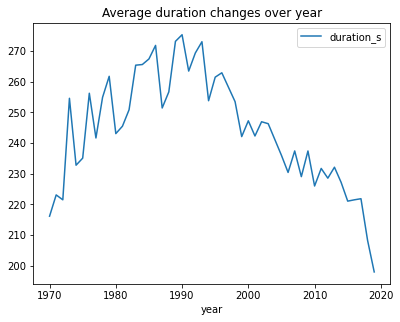

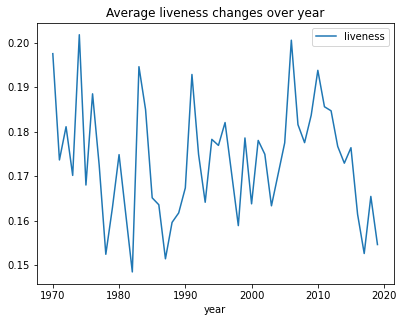

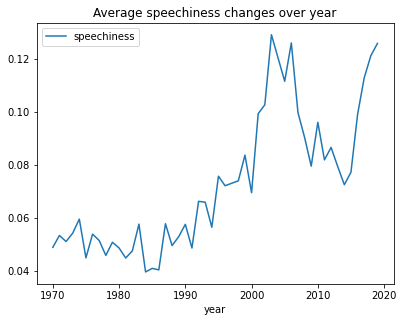

In [11]:
def get_average_x_by_y(x, y, sort):
    if (sort==True):
        return (songs.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (songs.groupby([y]).agg({str(x):'mean'}))

print(get_average_x_by_y('tempo', 'primary_artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Average tempo changes over year", xticks=range(1970, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Average duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Average liveness changes over year")

speechiness_by_years = get_average_x_by_y('speechiness', 'year', False)
speechiness_by_years.plot(title="Average speechiness changes over year")


<AxesSubplot:>

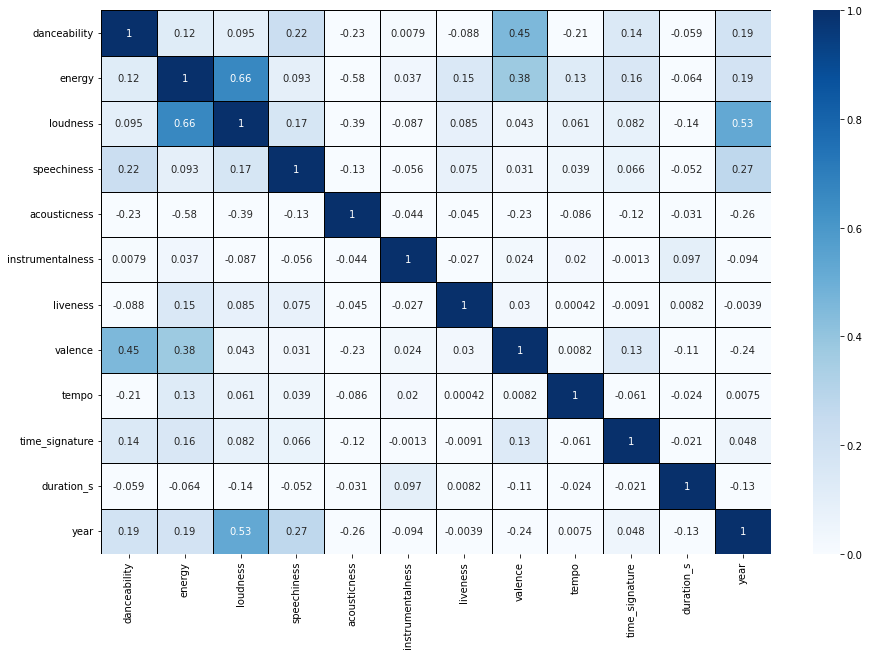

In [12]:
# Correlation between features
features = songs.drop(["primary_artist", "title"], axis=1)
corr = features.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

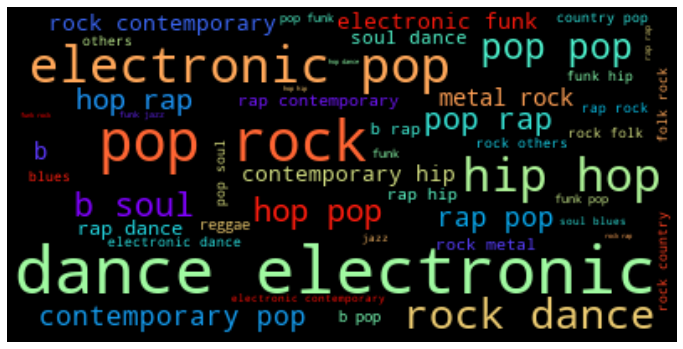

In [13]:
# Reformat the genres column
import ast
import itertools

genres_list = []
for entry in songs['genres']:
    new_entry = [n.strip() for n in ast.literal_eval(entry)]
    genres_list.append(new_entry)
    
joined_list = list(itertools.chain.from_iterable(genres_list))

# Genres wordcloud
from matplotlib import rcParams
genres = ' '.join(joined_list)
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

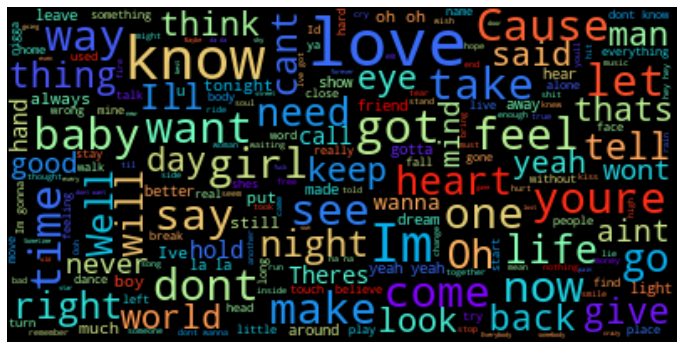

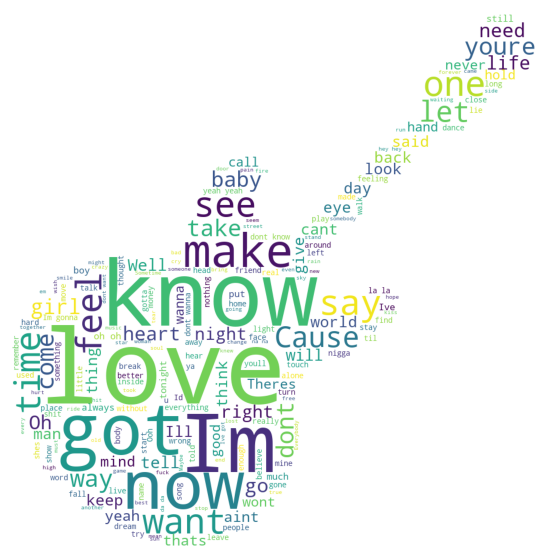

In [14]:
# Lyrics wordcloud
lyrics_list = songs['lyrics'].to_list()
lyrics_words = " ".join(map(str,lyrics_list))
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(lyrics_words)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

from PIL import Image
mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(background_color='white', max_words=200,
                     mask=mask).generate(lyrics_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

sia = SIA()
blobber = Blobber(analyzer=NaiveBayesAnalyzer())

def get_sentiment_scores(content):
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'content': content,
        'nltk': sia_scores['compound'],
})

for idx, lyrics in enumerate(songs['lyrics']):
    if type(lyrics) is not float:            
        scores = get_sentiment_scores(lyrics)
        songs.at[idx, 'nltk'] = scores['nltk']    

In [18]:
import text2emotion as te

for idx, lyrics in enumerate(songs['lyrics']):
    if type(lyrics) is not float:            
        emotions = te.get_emotion(lyrics)
        songs.at[idx, 'Happy'] = emotions['Happy']     
        songs.at[idx, 'Angry'] = emotions['Angry'] 
        songs.at[idx, 'Surprise'] = emotions['Surprise']    
        songs.at[idx, 'Sad'] = emotions['Sad'] 
        songs.at[idx, 'Fear'] = emotions['Fear']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
songs

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy    key  loudness   mode  speechiness  acousticness  \
0      0.403      C    -8.339  Major       0.0322        0.6310   
1      0.876      C    -8.867  Major       0.0362        0.3570   
2      0.473      D   -11.454  Major       0.0601        0.5450   
3      0.797      G    -6.793  Major       0.0332        0.0424   
4      0.470      E    -9.135  Major       0.0356        0.5790   
...      ...    ...       ...    ...          ...           ...   
4795   0.839      B    -9.447  minor       0.2080        0.0933   
4796   0.538      F    -6.672  Major       0.0335        0.1700   
4797   0.678      A    -8.635  Major       0.1090        0.0669   
4798   0.460      F    -4.173  Major       0.2590        0.4760   
4799   0.136  F♯/G♭    -9.267  Major       0.0458        0.9320   

      instrumentalness  ...  duration_s  year  \
0             0.000000  ...         243  1970   
1             0.000005  ...         175  1970   
2             0.000001  ...         199  1970   
3             0.000407  ...         147  1970   
4             0.000000  ...         135  1970   
...                ...  ...         ...   ...   
4795          0.000000  ...         191  2019   
4796          0.000003  ...         234  2019   
4797          0.000000  ...         201  2019   
4798          0.000000  ...         158  2019   
4799          0.000000  ...         226  2019   

                                       genres  \
0                                    ['rock']   
1                            ['folk', 'rock']   
2                           ['blues', 'soul']   
3                                    ['rock']   
4                            ['folk', 'rock']   
...                                       ...   
4795  ['dance/electronic', 'hip hop', 'rock']   
4796                                  ['pop']   
4797                                  ['rap']   
4798                                  ['pop']   
4799                                  ['pop']   

                                                 lyrics    nltk  Happy Angry  \
0     When I find myself in times of trouble Mother ...  0.9856   0.00  0.35   
1     Cilia youre breaking my heart. Youre shaking m...  0.9716   0.17  0.00   
2     Billy Ray was a preachers son. And when his da...  0.9271   0.00  0.20   
3     Long as I remember the rain been coming down. ...  0.1280   0.12  0.06   
4     They paved paradise and put up a parking lot. ...  0.9091   0.03  0.10   
...                                                 ...     ...    ...   ...   
4795  No one sees. No one. One. No one sees. No one ... -0.9618   0.00  0.00   
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On... -0.7753   0.09  0.36   
4797  Right now. I just need you to get real loose. ...  0.9853   0.33  0.00   
4798  Is it easier to stay Is it easier to go. I don...  0.9900   0.29  0.29   
4799  Standing on the platform watching you go. Its ... -0.8271   0.19  0.04   

     Surprise   Sad  Fear  
0        0.00  0.05  0.60  
1        0.17  0.40  0.27  
2        0.30  0.40  0.10  

In [21]:
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import tensorflow as tf

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from tf.keras.preprocessing.text import Tokenizer
# from tf.python.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
import string

xData = []
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

for lyric in songs['lyrics']:
    if type(lyric) is not float:
        # Tokenize each lyric, and set all characters to lower-case
        tokens = word_tokenize(lyric)
        tokens = [word.lower() for word in tokens]

        # Remove punctuation
        tokens_nopunc = [word.translate(translator) for word in tokens]

        # Remove non-alphabetic tokens
        words = [word for word in tokens_nopunc if word.isalpha()]

        # Remove stop words from the lyric
        words = [word for word in words if not word in stop_words]

        # Append to training data
        xData.append(words)

In [25]:
xData

[['find',
  'times',
  'trouble',
  'mother',
  'mary',
  'comes',
  'speaking',
  'words',
  'wisdom',
  'let',
  'hour',
  'darkness',
  'standing',
  'right',
  'front',
  'speaking',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'brokenhearted',
  'people',
  'living',
  'world',
  'agree',
  'answer',
  'let',
  'though',
  'may',
  'parted',
  'still',
  'chance',
  'see',
  'answer',
  'let',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'answer',
  'let',
  'let',
  'let',
  'let',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'night',
  'cloudy',
  'still',
  'light',
  'shines',
  'shine',
  'til',
  'tomorrow',
  'let',
  'wake',
  'sound',
  'music',
  'mother',
  'mary',
  'comes',
  'speaking',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'let',
  'oh',
  'answer',
  'let',
  '

In [15]:
# For each, maps each word token to an integer
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(xData)
xData_seq = tokenizer.texts_to_sequences(xData)

# Pad sequences shorter than max length 
max_num_tokens = max([len(tokenized_lyric) for tokenized_lyric in xData])
xData_seq_padded = pad_sequences(xData_seq, maxlen=max_num_tokens)

[['find',
  'times',
  'trouble',
  'mother',
  'mary',
  'comes',
  'speaking',
  'words',
  'wisdom',
  'let',
  'hour',
  'darkness',
  'standing',
  'right',
  'front',
  'speaking',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'brokenhearted',
  'people',
  'living',
  'world',
  'agree',
  'answer',
  'let',
  'though',
  'may',
  'parted',
  'still',
  'chance',
  'see',
  'answer',
  'let',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'answer',
  'let',
  'let',
  'let',
  'let',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'let',
  'whisper',
  'words',
  'wisdom',
  'let',
  'night',
  'cloudy',
  'still',
  'light',
  'shines',
  'shine',
  'til',
  'tomorrow',
  'let',
  'wake',
  'sound',
  'music',
  'mother',
  'mary',
  'comes',
  'speaking',
  'words',
  'wisdom',
  'let',
  'let',
  'let',
  'let',
  'yeah',
  'let',
  'oh',
  'answer',
  'let',
  '